<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h1>Forward Propagation</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 949ba3444a51980350889dcd60656a33739e7c3d

numpy     : 1.20.1
pandas    : 1.2.2
json      : 2.0.9
watermark : 2.1.0
seaborn   : 0.11.0
matplotlib: 3.3.2



In [3]:
plt.style.use('./d4sci.mplstyle')

## Activation functions

We start by setting up the range of the input values we'll use for vizualization purposes

In [4]:
z = np.linspace(-6, 6, 100)

## Linear

In [5]:
def linear(z):
    return z

def linearGradient(z):
    return np.ones(z.shape)

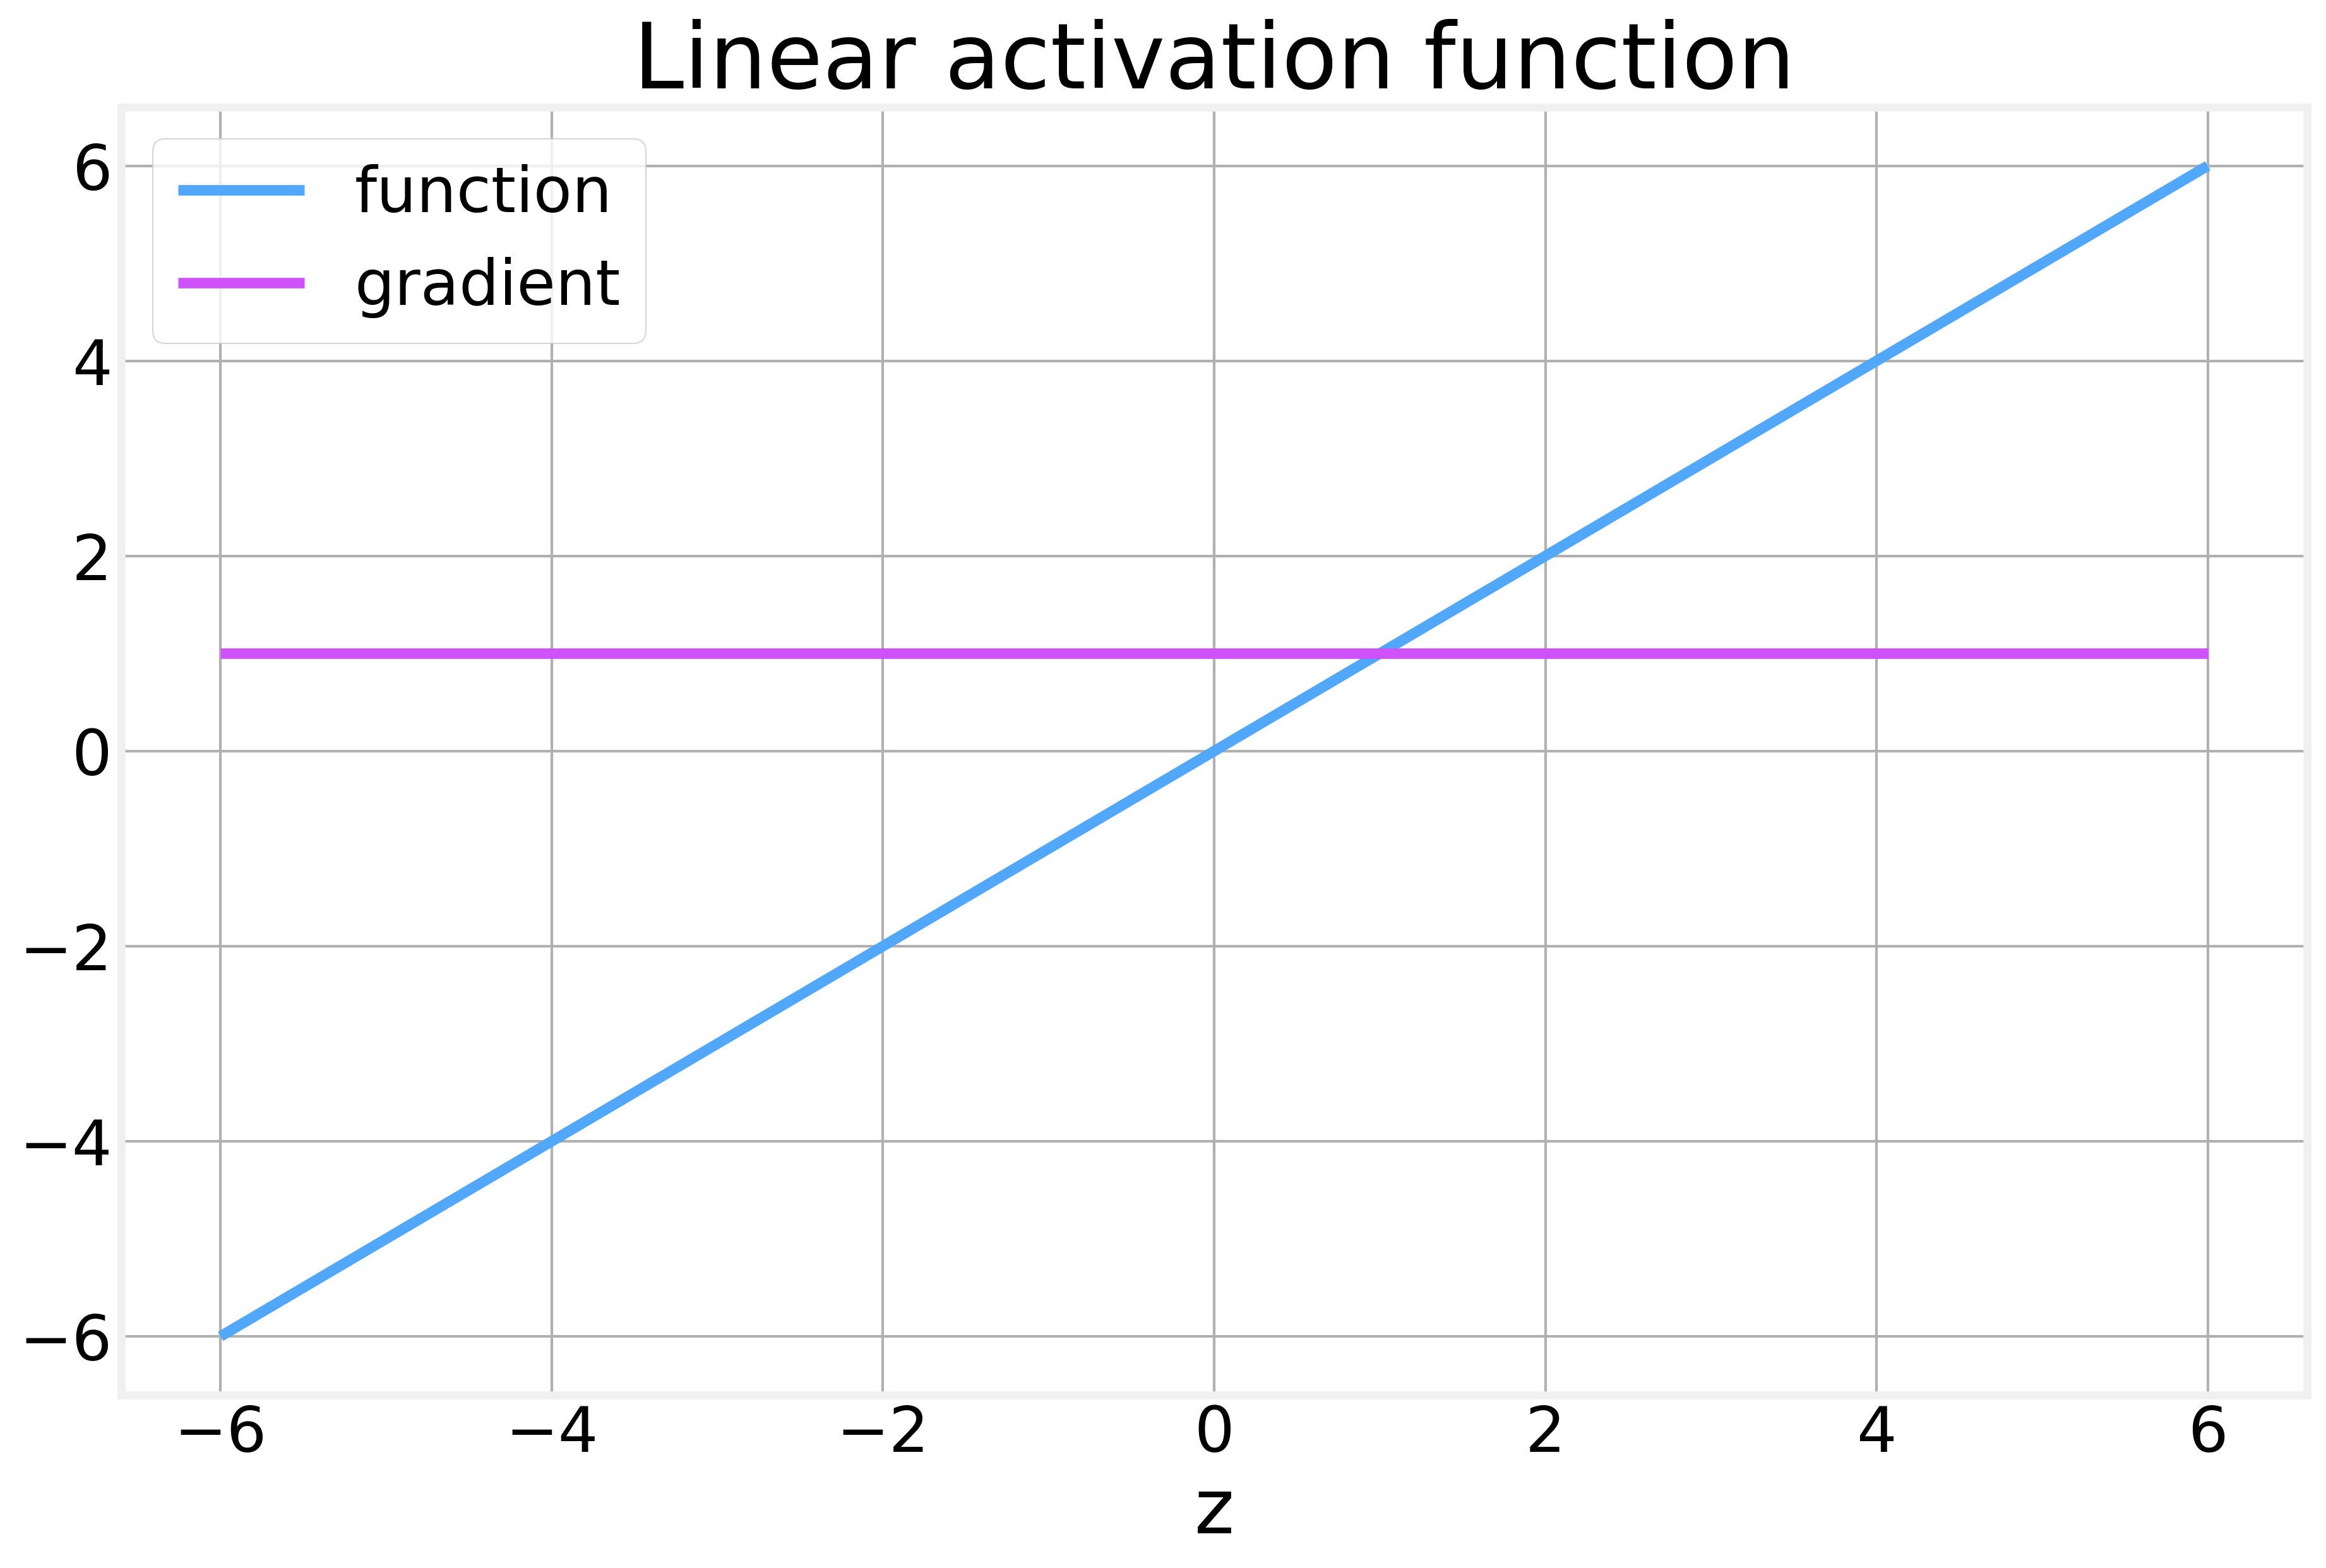

In [6]:
plt.plot(z, linear(z), '-')
plt.plot(z, linearGradient(z), '-')
plt.xlabel('z')
plt.title('Linear activation function')
plt.legend(['function', 'gradient'])

## Sigmoid

In [7]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def sigmoidGradient(z):
    h = sigmoid(z)
    return h*(1-h)

Text(0.5, 1.0, 'Sigmoid activation function')

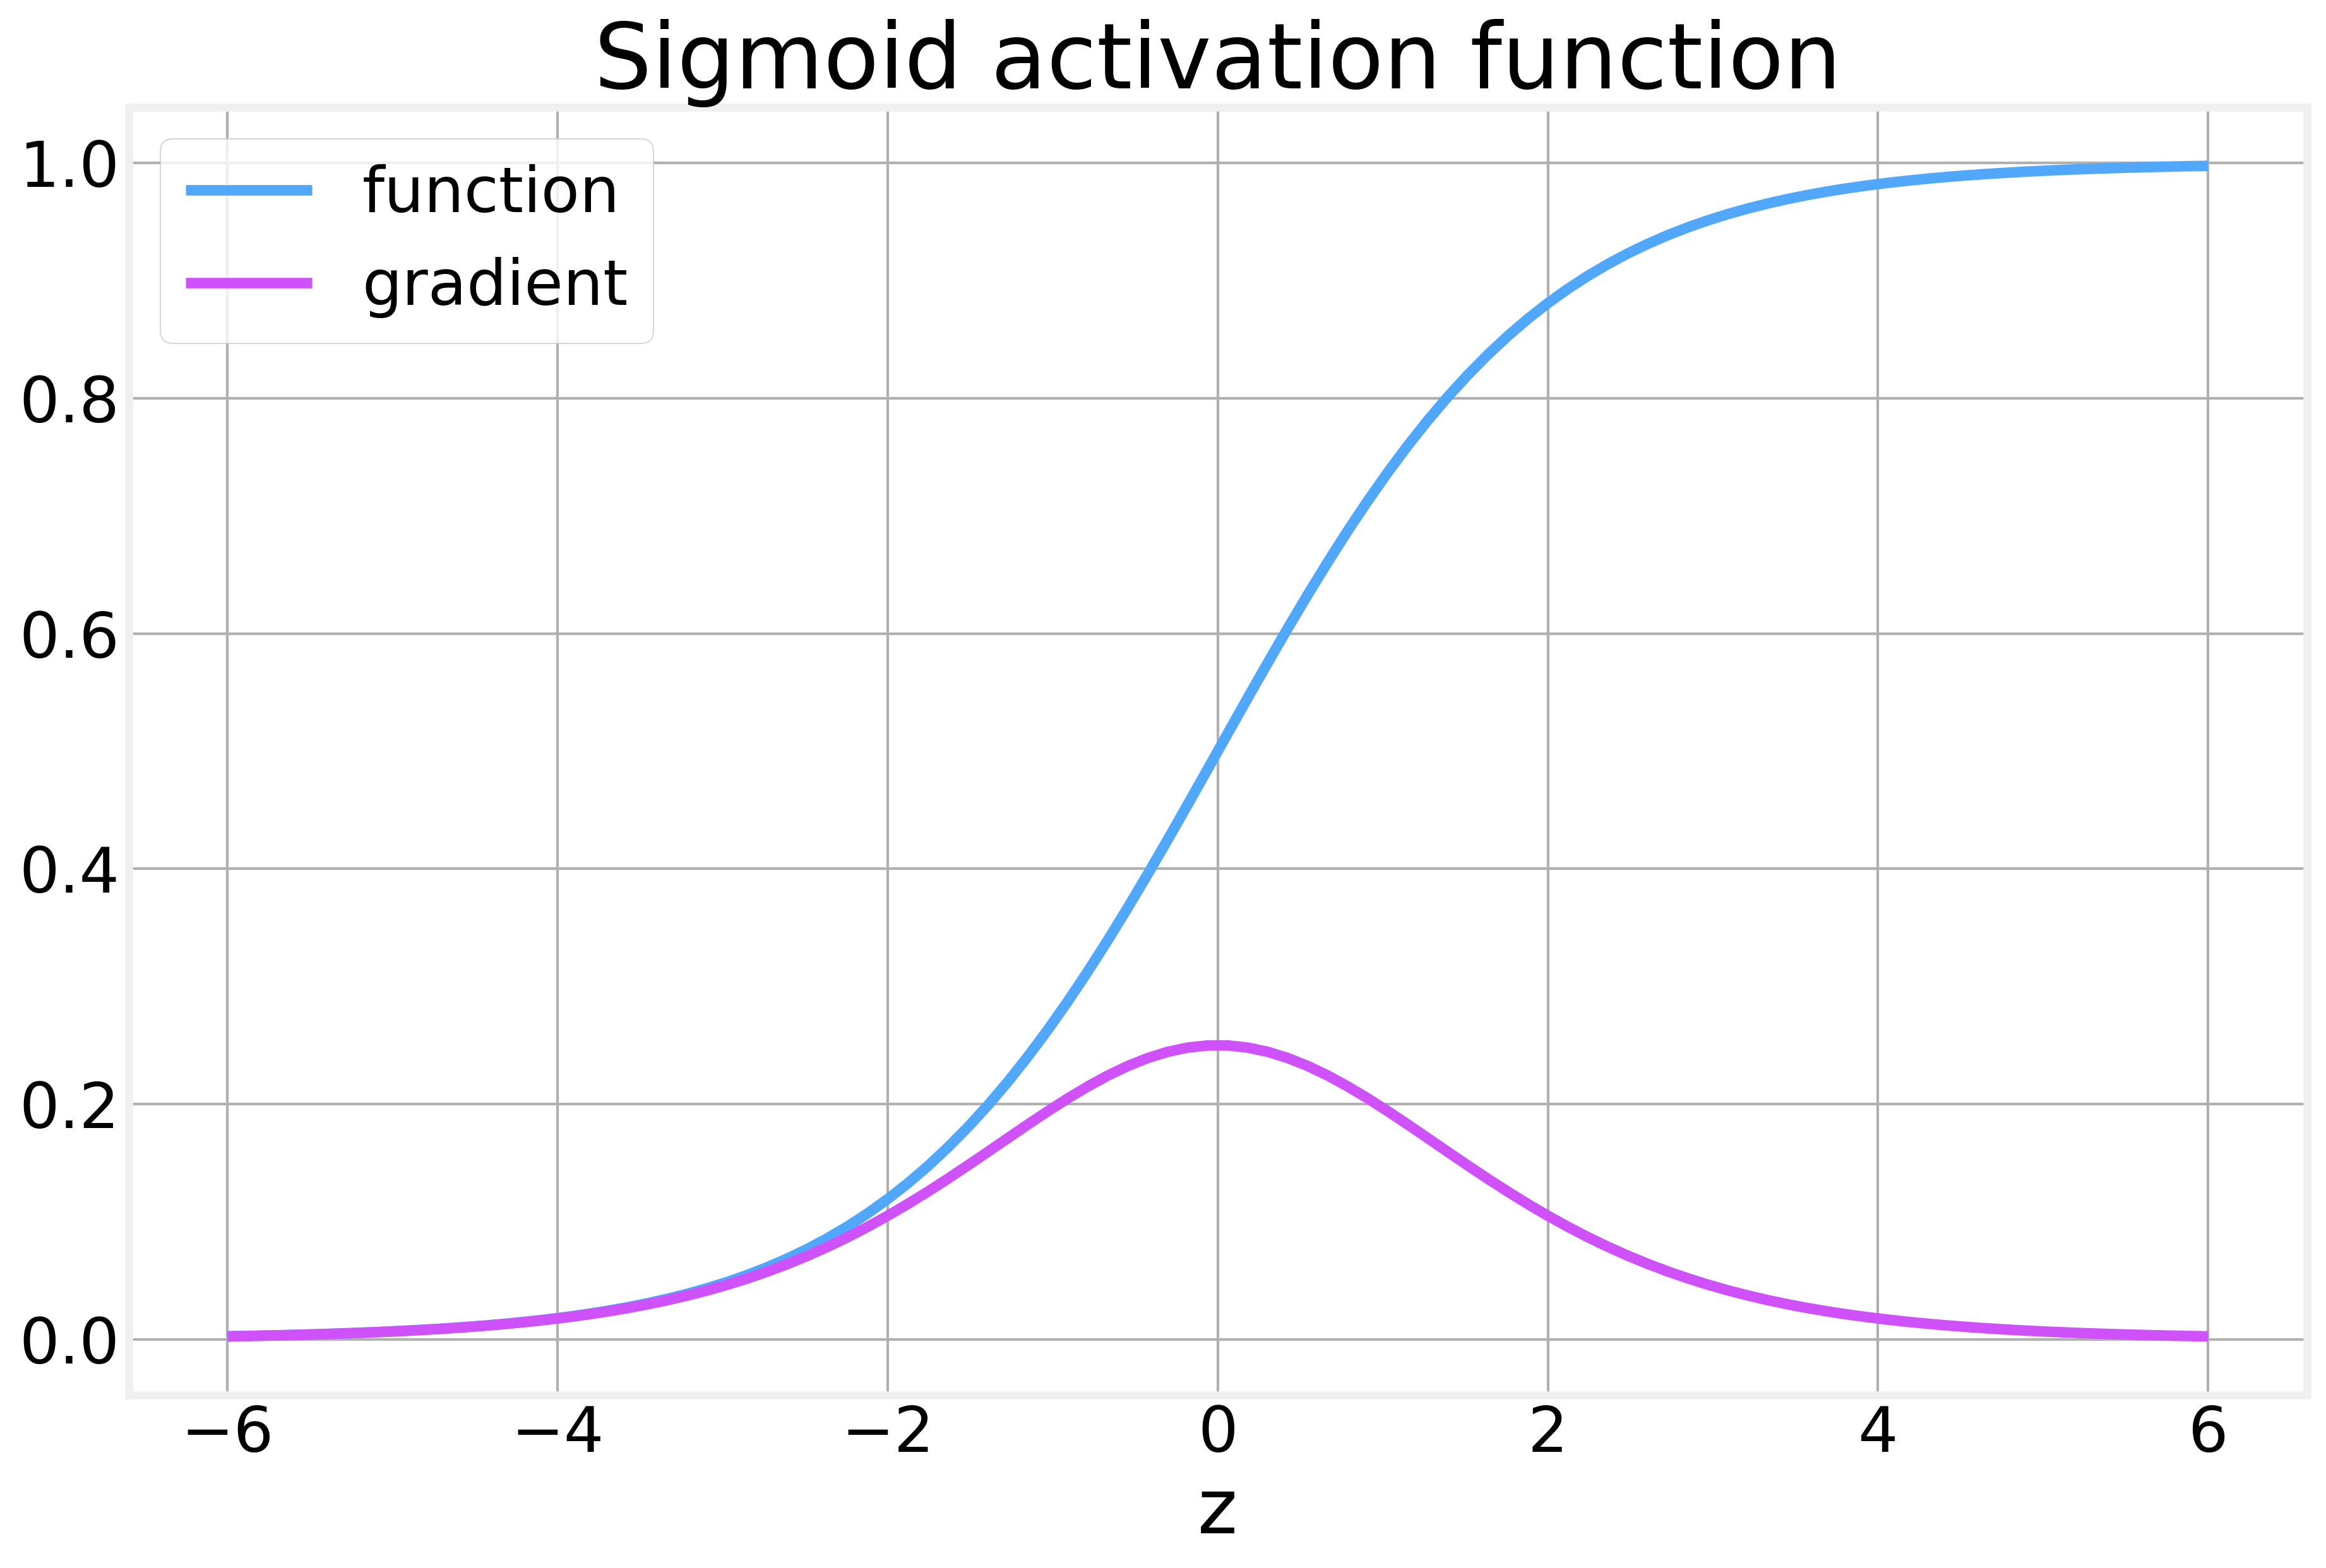

In [8]:
plt.plot(z, sigmoid(z), '-')
plt.plot(z, sigmoidGradient(z), '-')
plt.legend(['function', 'gradient'])
plt.xlabel('z')
plt.title('Sigmoid activation function')

## Rectified Linear

In [9]:
def relu(z):
    return np.where(z > 0, z, 0)


def reluGradient(z):
    return np.where(z > 0, 1, 0)

Text(0.5, 1.0, 'Rectified Linear activation function')

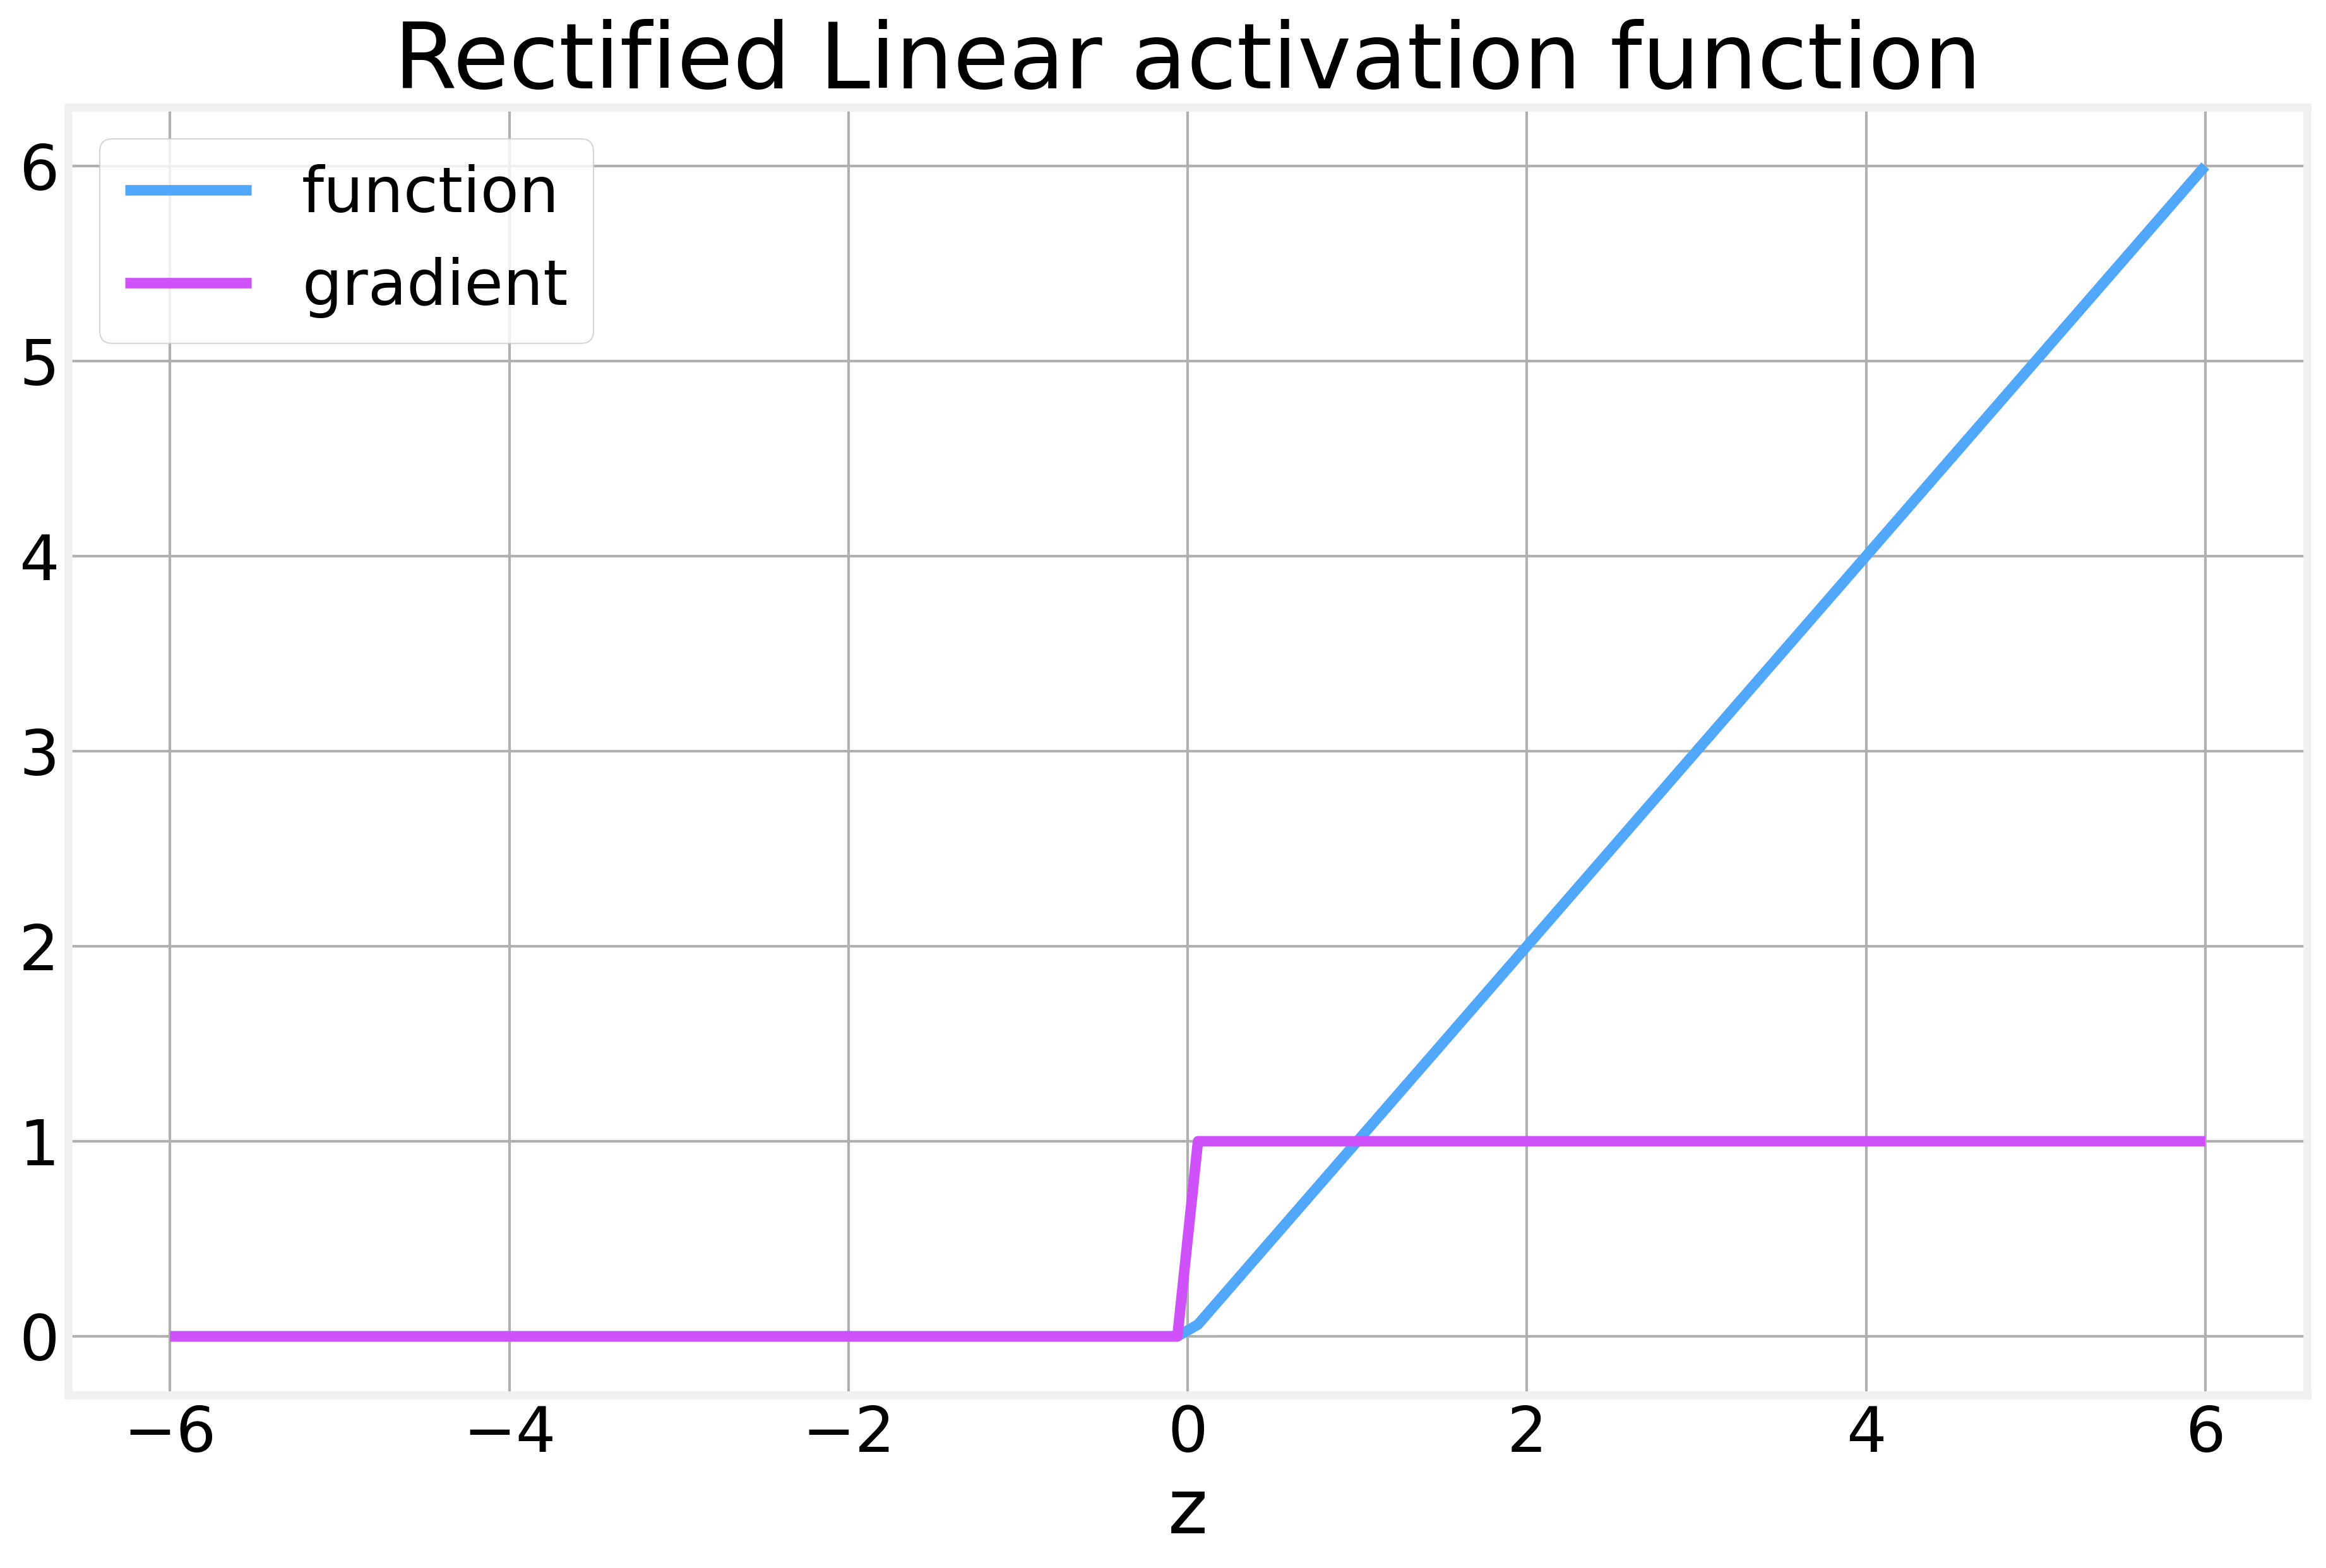

In [11]:
plt.plot(z, relu(z), '-')
plt.plot(z, reluGradient(z), '-')
plt.legend(['function', 'gradient'])
plt.xlabel('z')
plt.title('Rectified Linear activation function')

## Hyperbolic Tangent

In [12]:
def tanh(z):
    return np.tanh(z)


def tanhGradient(z):
    return 1-np.power(tanh(z), 2.0)

Text(0.5, 1.0, 'Hyperbolic Tangent activation function')

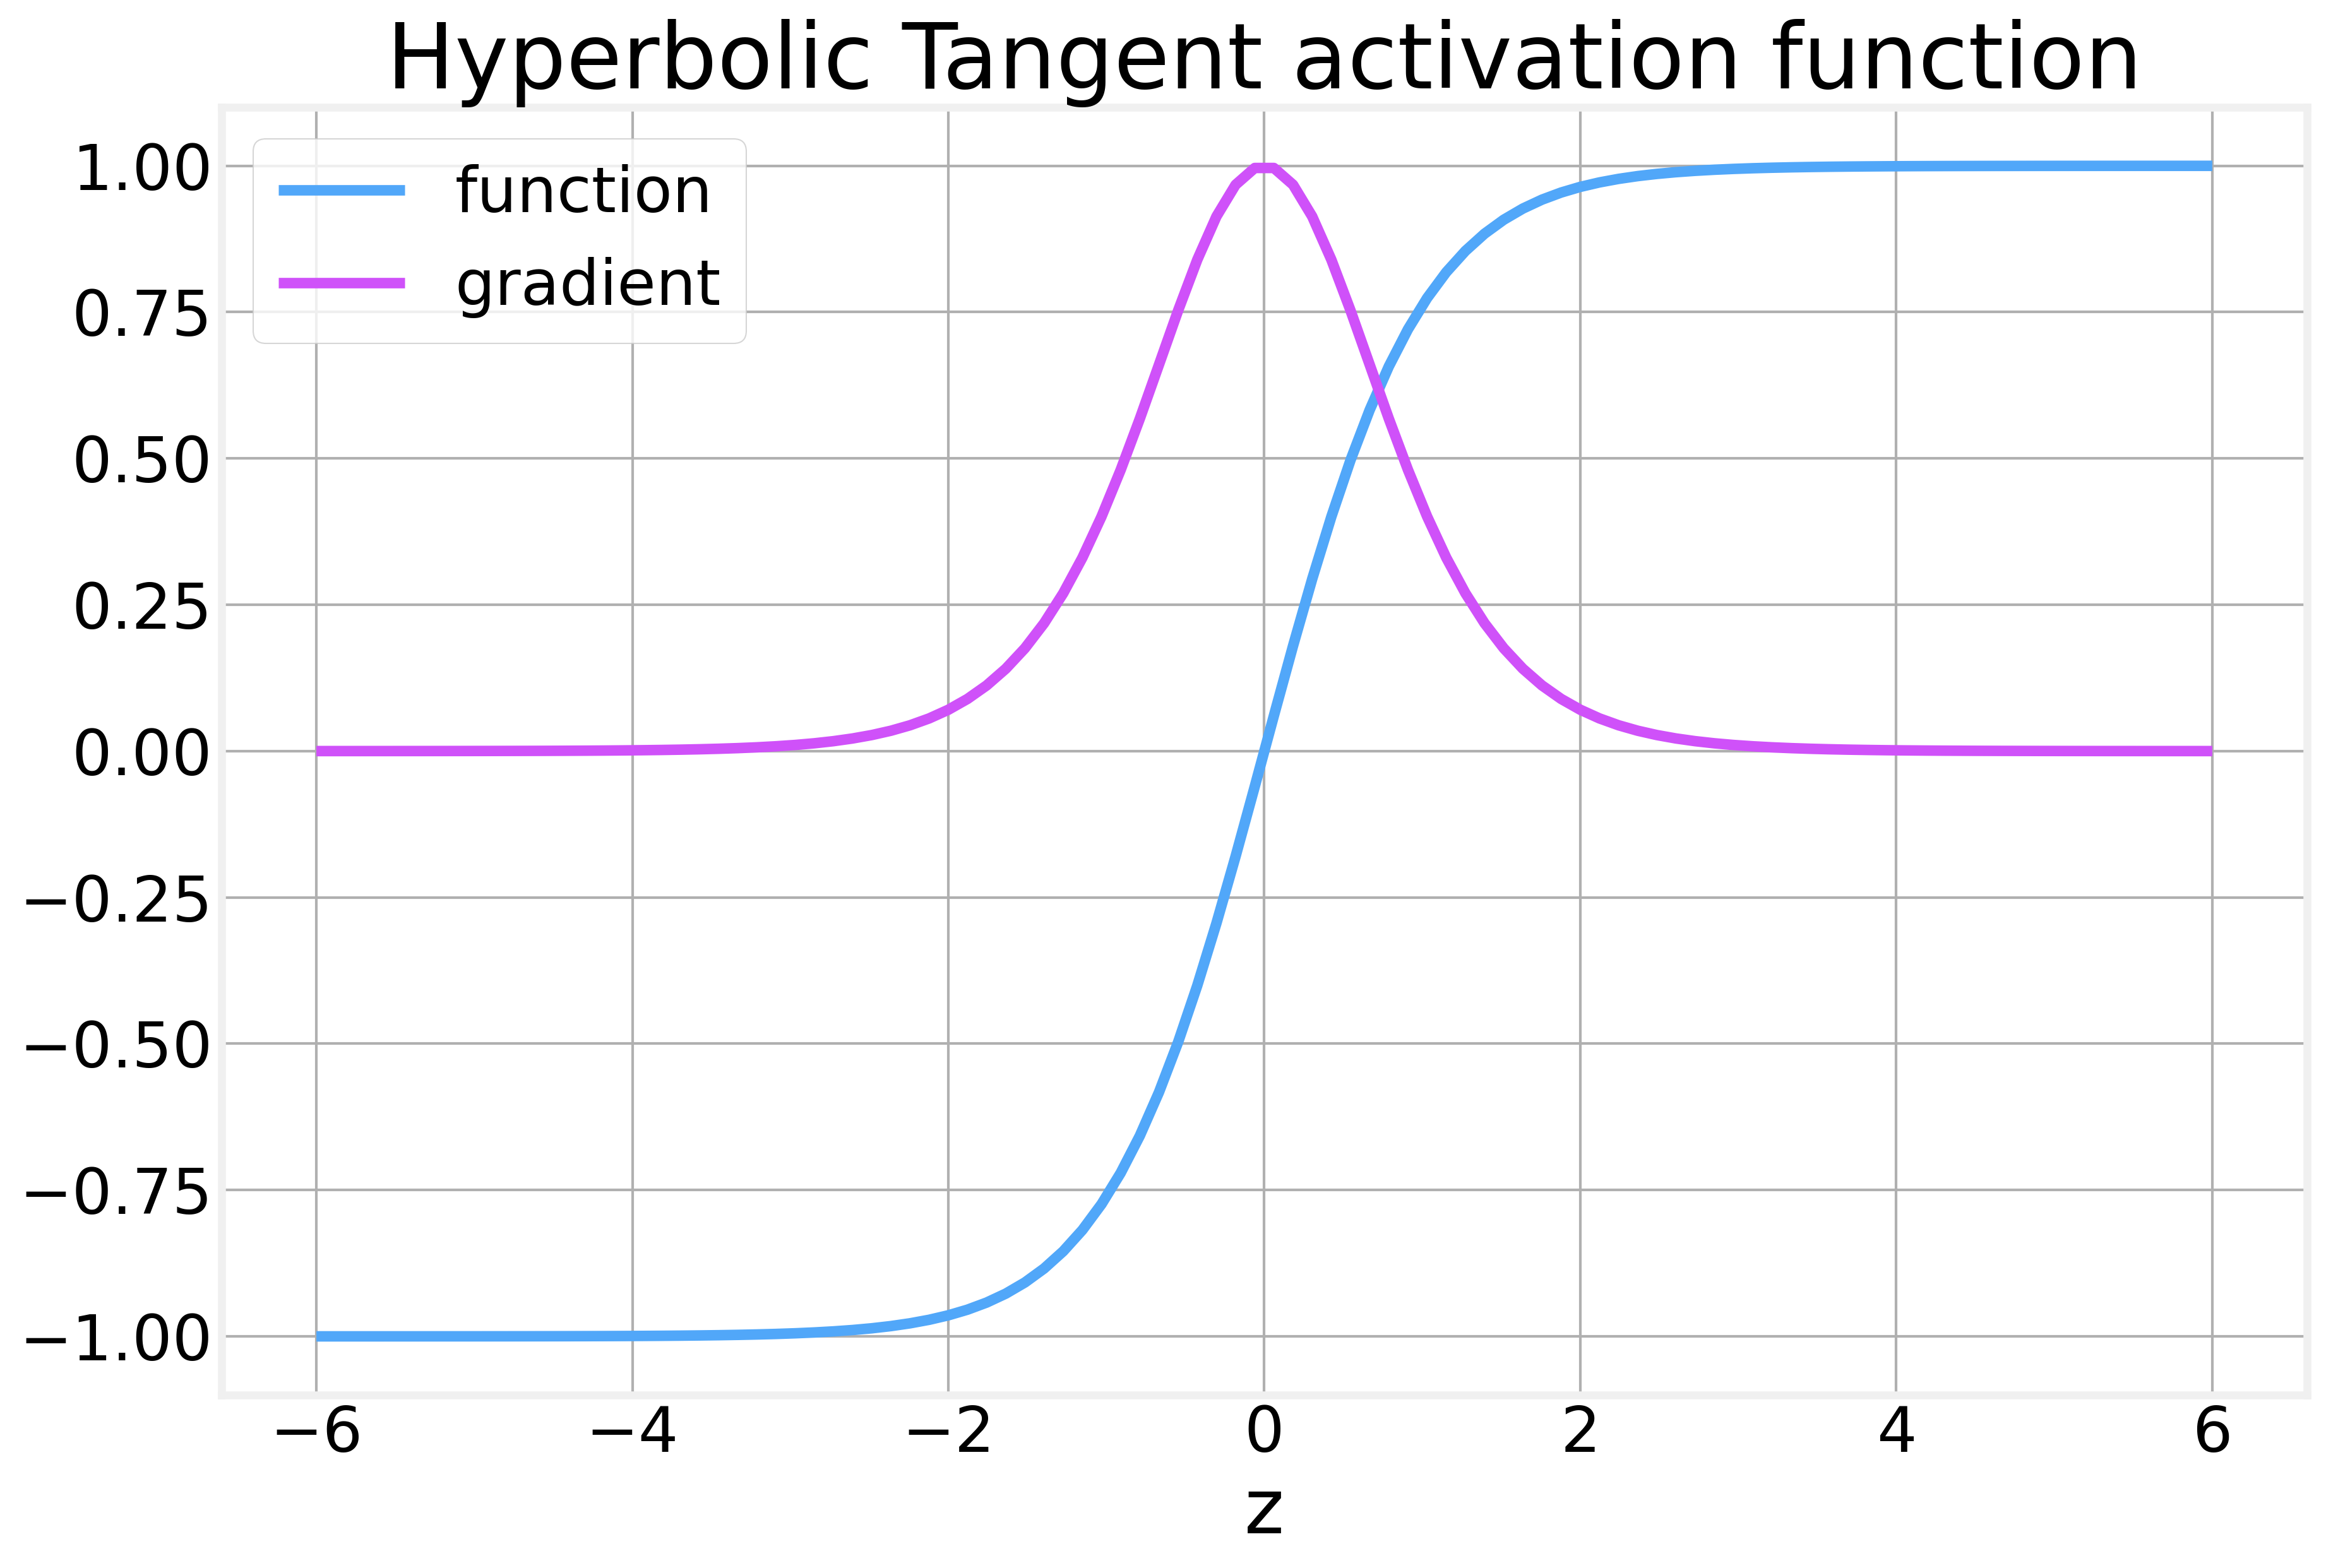

In [13]:
plt.plot(z, tanh(z), '-')
plt.plot(z, tanhGradient(z), '-')
plt.legend(['function', 'gradient'])
plt.xlabel('z')
plt.title('Hyperbolic Tangent activation function')

## Load saved data

In [14]:
X_train = np.load('input/X_train.npy')
y_train = np.load('input/y_train.npy')

## Data Visualization

Now that we have loaded the data, we can take a look at specific instances. The first step is to reshape one of the rows in our data matrix back into the original shape, a 28x28 matrix

In [34]:
pos = 101
digit = X_train[pos, :].reshape((28, 28))

Now we can just use *imshow* to display it with the right color map

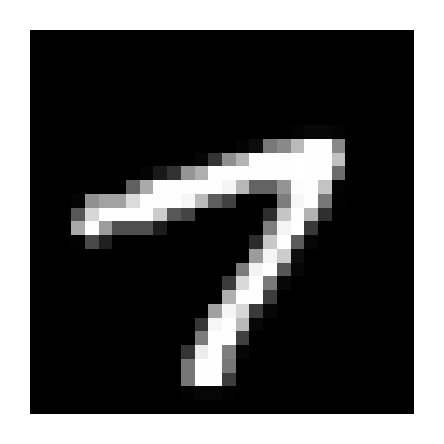

In [35]:
fig, ax = plt.subplots(1, 1)
ax.imshow(digit, cmap='gray')
ax.axis(False)
fig.set_size_inches(2, 2)

And to get a sample of all each digit

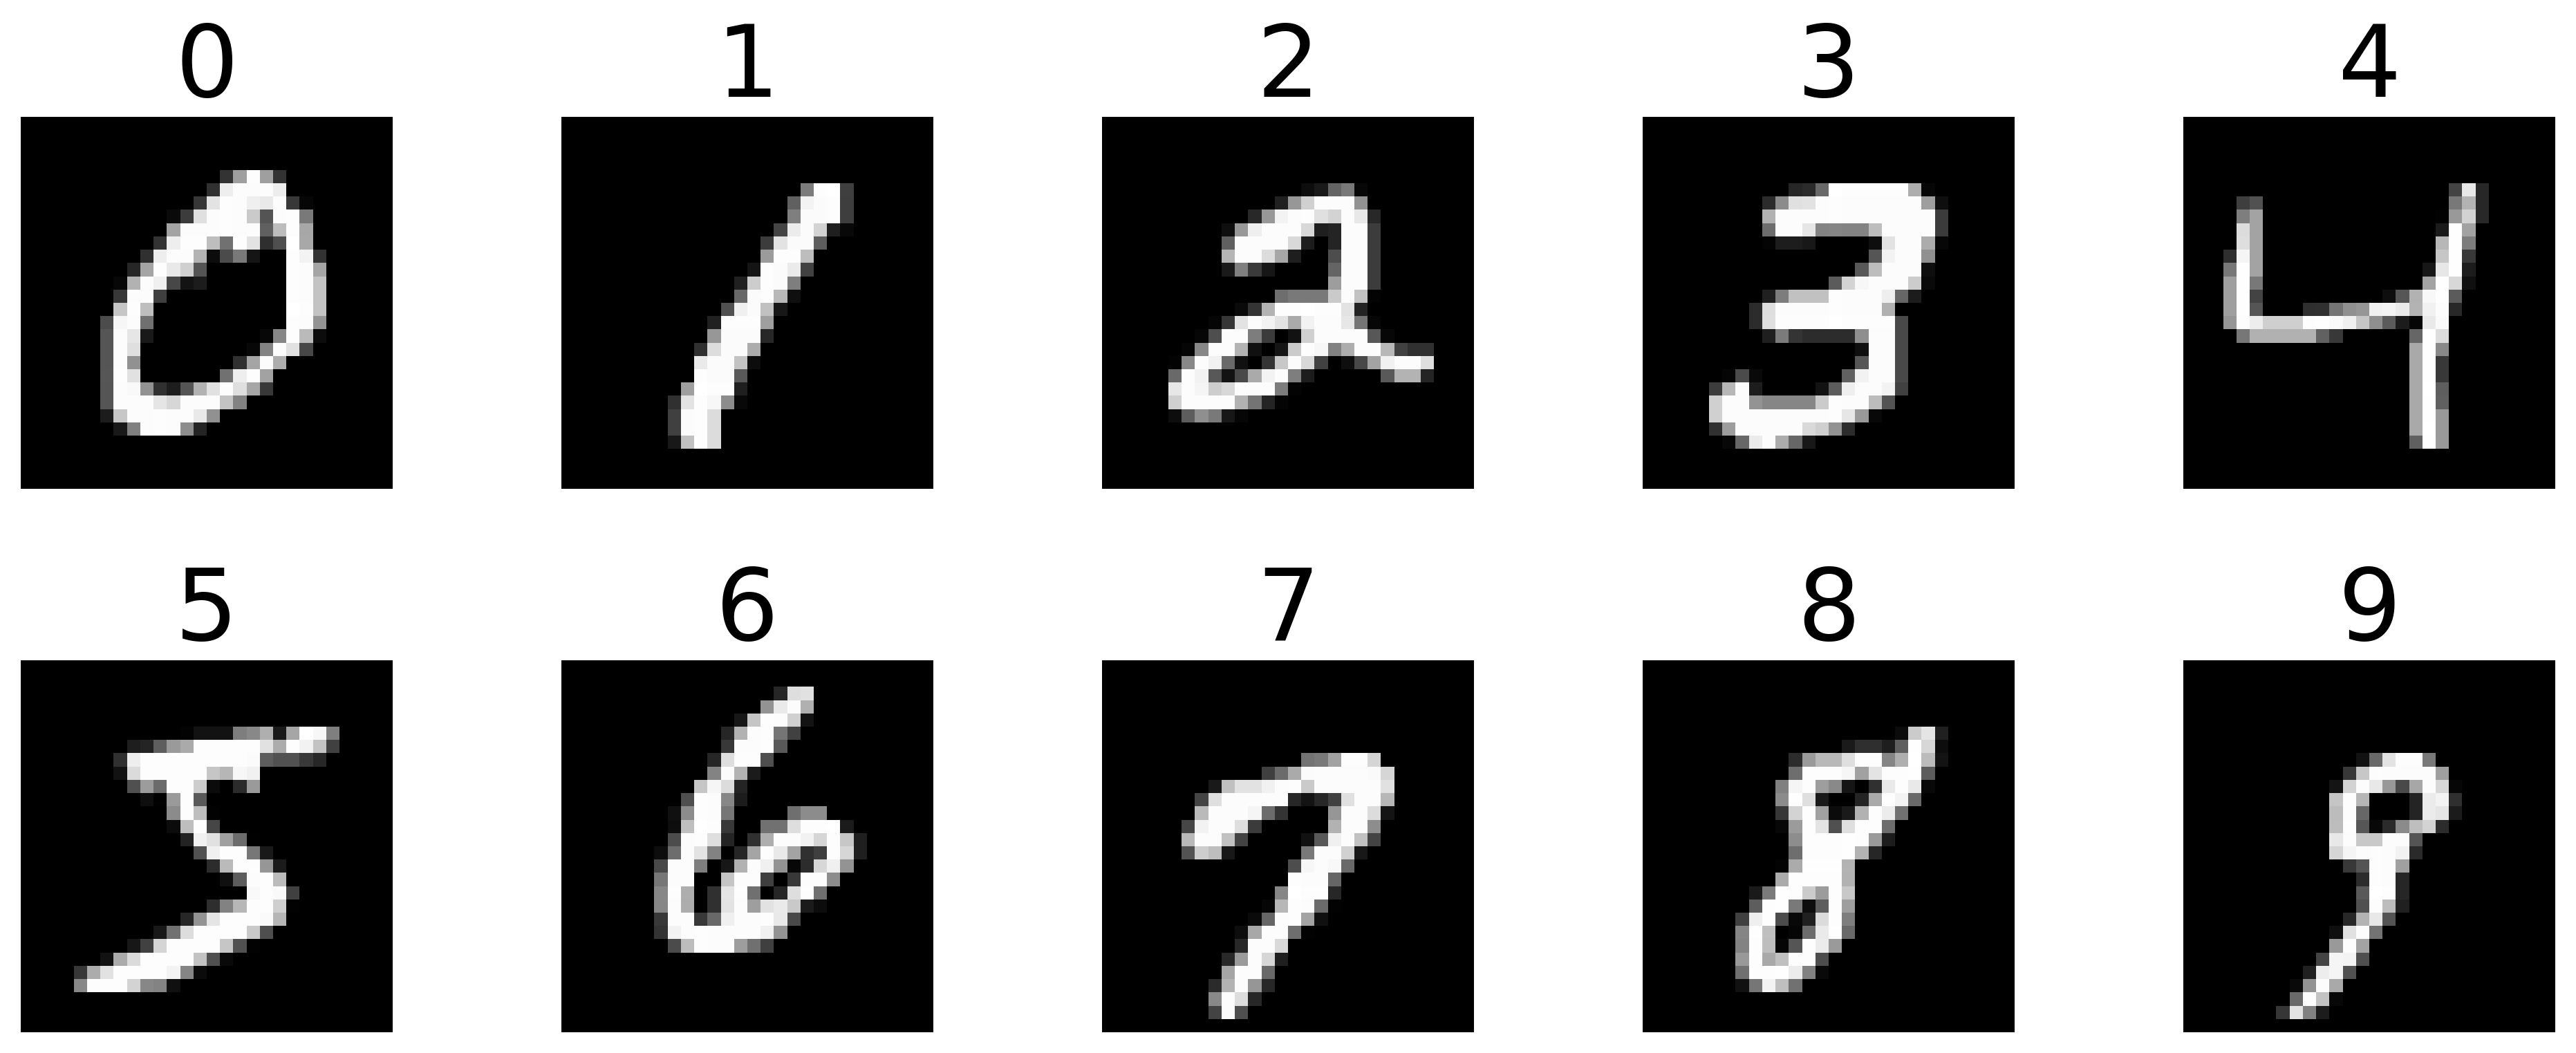

In [21]:
fig, axs_lst = plt.subplots(2, 5, figsize=(14, 5.6))
axs_lst = np.array(axs_lst).flatten()

instances = [1, 3, 5, 7, 2, 0, 13, 15, 17, 19]

for i, instance in enumerate(instances):
    axs_lst[i].imshow(X_train[instance, :].reshape((28, 28)), cmap='gray')
    axs_lst[i].set_title(i)
    axs_lst[i].axis('off')

plt.tight_layout()

## Load weights

These were previously trained. Loading them here for simplicity and we'll go over the training procedure in a bit

In [22]:
Theta1 = np.load('input/Theta1.npy')
Theta2 = np.load('input/Theta2.npy')

## Forward propagation

In [18]:
Theta2.shape

(10, 51)

In [23]:
def forward(Theta, X, active):
    N = X.shape[0]

    # Add the bias column
    X_ = np.concatenate((np.ones((N, 1)), X), 1)

    # Multiply by the weights
    z = np.dot(X_, Theta.T)

    # Apply the activation function
    a = active(z)

    return a

## Predict function

The predict function effectively implements the actual model. It forward propagates the inputs through all the layers will the correct activation functions at each step and returns the final output

In [25]:
def predict(Theta1, Theta2, X):
    h1 = forward(Theta1, X, sigmoid)
    h2 = forward(Theta2, h1, sigmoid)

    return np.argmax(h2, 1)

## Check Accuracy

The accuracy is just the fraction of correctly predicted results

In [26]:
def accuracy(y_, y):
    return np.mean((y_ == y.flatten()))*100.

In [31]:
predict(Theta1, Theta2, X_train[100:102, :])

<ipython-input-7-1d38ed15ed6c>:2: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-z))


array([5, 7])

In [27]:
y_ = predict(Theta1, Theta2, X_train)

print(accuracy(y_, y_train))

92.12


<ipython-input-7-1d38ed15ed6c>:2: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-z))


<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>